Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/anchal/opt/anaconda3/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/n7/j3y48f614k54_fs37n2khdc40000gn/T/423408dc0305437cb7d53a8f8f753cd0-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/n7/j3y48f614k54_fs37n2khdc40000gn/T/423408dc0305437cb7d53a8f8f753cd0-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 15 RHS
At line 19 BOUNDS
At line 20 ENDATA
Problem MODEL has 3 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 1 (-2) rows, 2 (0) columns and 2 (-2) elements
0  Obj 0 Primal inf 2.999999 (1)
1  Obj 1.5
Optimal - objective value 1.5
After Postsolve, objective 1.5, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 1.5 - 1 iterations time 0.002, Presolve 0.00
Option for printingOptions changed from normal to al

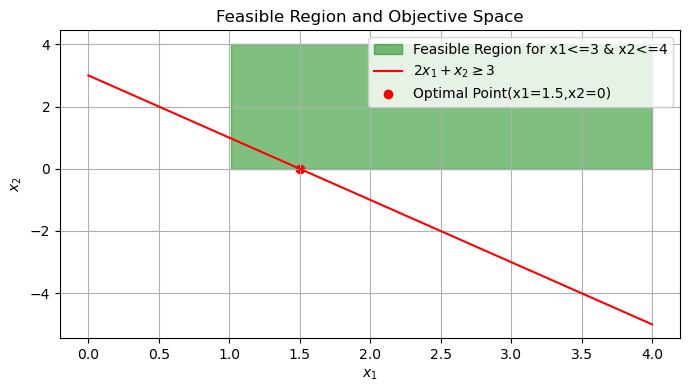

In [2]:
!pip install pulp
import pulp
import numpy as np
import matplotlib.pyplot as plt

model = pulp.LpProblem("BiObjectiveLPModel", pulp.LpMinimize)


x1 = pulp.LpVariable("x1", lowBound=0, cat="Continuous")
x2 = pulp.LpVariable("x2", lowBound=0, cat="Continuous")
obj1 = x1 
obj2 = x1 + 2*x2  


model += obj1
model += obj2

model += x1 <= 3
model += 2*x1 + x2 >= 3
model += x2 <= 4


model.solve()


if model.status == 1:
    print(f'Solution is optimal: {pulp.constants.LpStatusOptimal == 1}')
    
    # Print optimal values for x1 and x2
    print(f'Optimal value for x1 (Objective 1) = {x1.varValue}')
    print(f'Optimal value for x2 (Objective 2) = {x2.varValue}')
else:
    print(f'Failed to find solution: {pulp.LpStatus[model.status]}')

# Plotting the feasible region
x1_values = np.linspace(0, 4, 100)
x2_values_constraint = (3 - 2*x1_values)  # Constraint: 2x1 + x2 >= 3

plt.figure(figsize=(8, 4))

# Feasible region
plt.fill_between(x1_values, 0, 4, where=(2*x1_values + 1 >= 3), color='green', alpha=0.5, label='Feasible Region for x1<=3 & x2<=4')

# Constraint line
plt.plot(x1_values, x2_values_constraint, label=r'$2x_1 + x_2 \geq 3$', color='red')

# Optimal point
plt.scatter(x1.varValue, x2.varValue, color='red', label='Optimal Point(x1=1.5,x2=0)')

# Labels and title
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Feasible Region and Objective Space')

# Legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [2]:
!pip install pulp
import pulp
import numpy as np
import matplotlib.pyplot as plt

model = pulp.LpProblem("BiObjectiveLPModel", pulp.LpMinimize)

x1 = pulp.LpVariable("x1", lowBound=0, cat="Integer")  # Change variable type to Integer
x2 = pulp.LpVariable("x2", lowBound=0, cat="Integer")  # Change variable type to Integer

obj1 = x1 
obj2 = x1 + 2 * x2  

model += obj1
model += obj2

model += x1 <= 3
model += 2 * x1 + x2 >= 3
model += x2 <= 4

# Use pulp_CBC_CMD solver for integer programming
solver = pulp.pulpSolverCmd('cbc', msg=False)
model.solve(solver)

if model.status == 1:
    print(f'Solution is optimal: {pulp.constants.LpStatusOptimal == 1}')
    
    # Print optimal values for x1 and x2
    print(f'Optimal value for x1 (Objective 1) = {x1.varValue}')
    print(f'Optimal value for x2 (Objective 2) = {x2.varValue}')
else:
    print(f'Failed to find solution: {pulp.LpStatus[model.status]}')

# Plotting the feasible region
x1_values = np.linspace(0, 4, 100)
x2_values_constraint = (3 - 2 * x1_values)  # Constraint: 2x1 + x2 >= 3

plt.figure(figsize=(8, 4))

# Feasible region
plt.fill_between(x1_values, 0, 4, where=(2 * x1_values + 1 >= 3), color='green', alpha=0.5, label='Feasible Region for x1<=3 & x2<=4')

# Constraint line
plt.plot(x1_values, x2_values_constraint, label=r'$2x_1 + x_2 \geq 3$', color='red')

# Optimal point
plt.scatter(x1.varValue, x2.varValue, color='red', label=f'Optimal Point (x1={x1.varValue}, x2={x2.varValue})')

# Labels and title
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Feasible Region and Objective Space')

# Legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


AttributeError: module 'pulp' has no attribute 'pulpSolverCmd'